In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
import datetime
import talib

import yfinance as yf

import pandas_ta as ta
import numpy as np
import pandas as pd
import schedule
from time import sleep

from datetime import datetime as dt

In [2]:
data = pd.read_csv('3 min banknifty supertrend10_2 .csv')
data['datetime']=pd.to_datetime(data['datetime'])
data

,Unnamed: 0,Unnamed: 0.1,datetime,open,high,low,close,volume,time,strend10_2
0,0,0,2016-01-01 10:54:00,16911.9,16925.9,16906.2,16923.0,14610,10:54:00,16895.113210
1,1,1,2016-01-01 10:57:00,16921.0,16926.6,16907.1,16907.1,18450,10:57:00,16895.113210
2,2,2,2016-01-01 11:00:00,16909.0,16912.0,16906.0,16910.0,8730,11:00:00,16895.113210
3,3,3,2016-01-01 11:03:00,16911.4,16922.8,16906.3,16913.1,7440,11:03:00,16895.113210
4,4,4,2016-01-01 11:06:00,16915.0,16918.8,16912.0,16918.5,6120,11:06:00,16895.113210
...,...,...,...,...,...,...,...,...,...,...
154479,154479,154479,2020-12-31 15:18:00,31275.0,31277.7,31251.9,31269.6,33900,15:18:00,31327.978175
154480,154480,154480,2020-12-31 15:21:00,31266.0,31272.0,31263.5,31268.0,49000,15:21:00,31326.730159
154481,154481,154481,2020-12-31 15:24:00,31265.2,31268.0,31257.6,31264.8,45625,15:24:00,31318.309235
154482,154482,154482,2020-12-31 15:27:00,31262.4,31265.9,31259.9,31263.1,34000,15:27:00,31314.453850


In [3]:
data['datetime'].dt.time
data['time']=data['datetime'].dt.time
data

,Unnamed: 0,Unnamed: 0.1,datetime,open,high,low,close,volume,time,strend10_2
0,0,0,2016-01-01 10:54:00,16911.9,16925.9,16906.2,16923.0,14610,10:54:00,16895.113210
1,1,1,2016-01-01 10:57:00,16921.0,16926.6,16907.1,16907.1,18450,10:57:00,16895.113210
2,2,2,2016-01-01 11:00:00,16909.0,16912.0,16906.0,16910.0,8730,11:00:00,16895.113210
3,3,3,2016-01-01 11:03:00,16911.4,16922.8,16906.3,16913.1,7440,11:03:00,16895.113210
4,4,4,2016-01-01 11:06:00,16915.0,16918.8,16912.0,16918.5,6120,11:06:00,16895.113210
...,...,...,...,...,...,...,...,...,...,...
154479,154479,154479,2020-12-31 15:18:00,31275.0,31277.7,31251.9,31269.6,33900,15:18:00,31327.978175
154480,154480,154480,2020-12-31 15:21:00,31266.0,31272.0,31263.5,31268.0,49000,15:21:00,31326.730159
154481,154481,154481,2020-12-31 15:24:00,31265.2,31268.0,31257.6,31264.8,45625,15:24:00,31318.309235
154482,154482,154482,2020-12-31 15:27:00,31262.4,31265.9,31259.9,31263.1,34000,15:27:00,31314.453850


In [4]:
data.dropna(inplace=True)

In [5]:
data

,Unnamed: 0,Unnamed: 0.1,datetime,open,high,low,close,volume,time,strend10_2
0,0,0,2016-01-01 10:54:00,16911.9,16925.9,16906.2,16923.0,14610,10:54:00,16895.113210
1,1,1,2016-01-01 10:57:00,16921.0,16926.6,16907.1,16907.1,18450,10:57:00,16895.113210
2,2,2,2016-01-01 11:00:00,16909.0,16912.0,16906.0,16910.0,8730,11:00:00,16895.113210
3,3,3,2016-01-01 11:03:00,16911.4,16922.8,16906.3,16913.1,7440,11:03:00,16895.113210
4,4,4,2016-01-01 11:06:00,16915.0,16918.8,16912.0,16918.5,6120,11:06:00,16895.113210
...,...,...,...,...,...,...,...,...,...,...
154479,154479,154479,2020-12-31 15:18:00,31275.0,31277.7,31251.9,31269.6,33900,15:18:00,31327.978175
154480,154480,154480,2020-12-31 15:21:00,31266.0,31272.0,31263.5,31268.0,49000,15:21:00,31326.730159
154481,154481,154481,2020-12-31 15:24:00,31265.2,31268.0,31257.6,31264.8,45625,15:24:00,31318.309235
154482,154482,154482,2020-12-31 15:27:00,31262.4,31265.9,31259.9,31263.1,34000,15:27:00,31314.453850


In [6]:
data.reset_index(inplace=True)

In [7]:
data

,index,Unnamed: 0,Unnamed: 0.1,datetime,open,high,low,close,volume,time,strend10_2
0,0,0,0,2016-01-01 10:54:00,16911.9,16925.9,16906.2,16923.0,14610,10:54:00,16895.113210
1,1,1,1,2016-01-01 10:57:00,16921.0,16926.6,16907.1,16907.1,18450,10:57:00,16895.113210
2,2,2,2,2016-01-01 11:00:00,16909.0,16912.0,16906.0,16910.0,8730,11:00:00,16895.113210
3,3,3,3,2016-01-01 11:03:00,16911.4,16922.8,16906.3,16913.1,7440,11:03:00,16895.113210
4,4,4,4,2016-01-01 11:06:00,16915.0,16918.8,16912.0,16918.5,6120,11:06:00,16895.113210
...,...,...,...,...,...,...,...,...,...,...,...
154479,154479,154479,154479,2020-12-31 15:18:00,31275.0,31277.7,31251.9,31269.6,33900,15:18:00,31327.978175
154480,154480,154480,154480,2020-12-31 15:21:00,31266.0,31272.0,31263.5,31268.0,49000,15:21:00,31326.730159
154481,154481,154481,154481,2020-12-31 15:24:00,31265.2,31268.0,31257.6,31264.8,45625,15:24:00,31318.309235
154482,154482,154482,154482,2020-12-31 15:27:00,31262.4,31265.9,31259.9,31263.1,34000,15:27:00,31314.453850


In [8]:
data.drop(['index'],axis=1,inplace=True)

In [9]:
data

,Unnamed: 0,Unnamed: 0.1,datetime,open,high,low,close,volume,time,strend10_2
0,0,0,2016-01-01 10:54:00,16911.9,16925.9,16906.2,16923.0,14610,10:54:00,16895.113210
1,1,1,2016-01-01 10:57:00,16921.0,16926.6,16907.1,16907.1,18450,10:57:00,16895.113210
2,2,2,2016-01-01 11:00:00,16909.0,16912.0,16906.0,16910.0,8730,11:00:00,16895.113210
3,3,3,2016-01-01 11:03:00,16911.4,16922.8,16906.3,16913.1,7440,11:03:00,16895.113210
4,4,4,2016-01-01 11:06:00,16915.0,16918.8,16912.0,16918.5,6120,11:06:00,16895.113210
...,...,...,...,...,...,...,...,...,...,...
154479,154479,154479,2020-12-31 15:18:00,31275.0,31277.7,31251.9,31269.6,33900,15:18:00,31327.978175
154480,154480,154480,2020-12-31 15:21:00,31266.0,31272.0,31263.5,31268.0,49000,15:21:00,31326.730159
154481,154481,154481,2020-12-31 15:24:00,31265.2,31268.0,31257.6,31264.8,45625,15:24:00,31318.309235
154482,154482,154482,2020-12-31 15:27:00,31262.4,31265.9,31259.9,31263.1,34000,15:27:00,31314.453850


In [10]:
tradeloglong = pd.DataFrame(columns='trade_type,entry_time,entry_price,exit_time,exit_price'.split(','))

In [15]:
long_trade_triggered = 0
for index, row in data[1:].iterrows():
    previous_row = data.iloc[index-1]
   
    if (previous_row['close'] < previous_row['strend10_2']) & (row['close'] > row['strend10_2']) & (long_trade_triggered == 0):
        long_trade_triggered = 1
        tradeloglong = tradeloglong.append({'trade_type':'BUY',
                                      'entry_time':row['datetime'],
                                      'entry_price':row['close']},ignore_index=True)
        
    elif (long_trade_triggered == 1) & (previous_row['close'] > previous_row['strend10_2']) & (row['close'] < row['strend10_2'])  :
        long_trade_triggered = 0
        tradeloglong = tradeloglong.append({'exit_time':row['datetime'],
                                      'exit_price':row['close']},ignore_index=True)

In [16]:
tradeloglong

,trade_type,entry_time,entry_price,exit_time,exit_price
0,NaN,NaN,NaN,2016-01-01 11:33:00,16908.6
1,BUY,2016-01-01 12:06:00,16915.0,NaT,NaN
2,NaN,NaN,NaN,2016-01-01 12:39:00,16894.4
3,BUY,2016-01-01 13:30:00,16895.0,NaT,NaN
4,NaN,NaN,NaN,2016-01-01 14:06:00,17135.9
...,...,...,...,...,...
60366,NaN,NaN,NaN,2020-12-30 15:18:00,31291.8
60367,BUY,2020-12-31 09:21:00,31248.7,NaT,NaN
60368,NaN,NaN,NaN,2020-12-31 10:54:00,31285.0
60369,BUY,2020-12-31 12:30:00,31254.5,NaT,NaN


In [17]:
tradeloglong['exit_time'] = tradeloglong['exit_time'].shift(-1)
tradeloglong['exit_price'] = tradeloglong['exit_price'].shift(-1)

In [18]:
tradeloglong

,trade_type,entry_time,entry_price,exit_time,exit_price
0,NaN,NaN,NaN,NaT,NaN
1,BUY,2016-01-01 12:06:00,16915.0,2016-01-01 12:39:00,16894.4
2,NaN,NaN,NaN,NaT,NaN
3,BUY,2016-01-01 13:30:00,16895.0,2016-01-01 14:06:00,17135.9
4,NaN,NaN,NaN,2016-01-01 14:09:00,17125.0
...,...,...,...,...,...
60366,NaN,NaN,NaN,NaT,NaN
60367,BUY,2020-12-31 09:21:00,31248.7,2020-12-31 10:54:00,31285.0
60368,NaN,NaN,NaN,NaT,NaN
60369,BUY,2020-12-31 12:30:00,31254.5,2020-12-31 14:15:00,31322.5


In [19]:
tradeloglong.dropna(inplace=True)

In [20]:
#tradeloglong.dropna(inplace=True)
tradeloglong.reset_index(drop=True,inplace=True)
tradeloglong

,trade_type,entry_time,entry_price,exit_time,exit_price
0,BUY,2016-01-01 12:06:00,16915.0,2016-01-01 12:39:00,16894.4
1,BUY,2016-01-01 13:30:00,16895.0,2016-01-01 14:06:00,17135.9
2,BUY,2016-01-04 14:18:00,16663.9,2016-01-04 14:24:00,16659.0
3,BUY,2016-01-05 09:18:00,16655.7,2016-01-05 09:21:00,16658.6
4,BUY,2016-01-05 10:12:00,16644.3,2016-01-05 10:24:00,16660.1
...,...,...,...,...,...
6593,BUY,2020-12-30 09:42:00,31304.0,2020-12-30 10:27:00,31166.1
6594,BUY,2020-12-30 10:57:00,31286.9,2020-12-30 11:36:00,31186.2
6595,BUY,2020-12-30 13:00:00,31160.8,2020-12-30 15:18:00,31291.8
6596,BUY,2020-12-31 09:21:00,31248.7,2020-12-31 10:54:00,31285.0


In [21]:
tradeloglong['pnl'] = tradeloglong['exit_price'] - tradeloglong['entry_price']

In [22]:
tradeloglong

,trade_type,entry_time,entry_price,exit_time,exit_price,pnl
0,BUY,2016-01-01 12:06:00,16915.0,2016-01-01 12:39:00,16894.4,-20.6
1,BUY,2016-01-01 13:30:00,16895.0,2016-01-01 14:06:00,17135.9,240.9
2,BUY,2016-01-04 14:18:00,16663.9,2016-01-04 14:24:00,16659.0,-4.9
3,BUY,2016-01-05 09:18:00,16655.7,2016-01-05 09:21:00,16658.6,2.9
4,BUY,2016-01-05 10:12:00,16644.3,2016-01-05 10:24:00,16660.1,15.8
...,...,...,...,...,...,...
6593,BUY,2020-12-30 09:42:00,31304.0,2020-12-30 10:27:00,31166.1,-137.9
6594,BUY,2020-12-30 10:57:00,31286.9,2020-12-30 11:36:00,31186.2,-100.7
6595,BUY,2020-12-30 13:00:00,31160.8,2020-12-30 15:18:00,31291.8,131.0
6596,BUY,2020-12-31 09:21:00,31248.7,2020-12-31 10:54:00,31285.0,36.3


<AxesSubplot:>

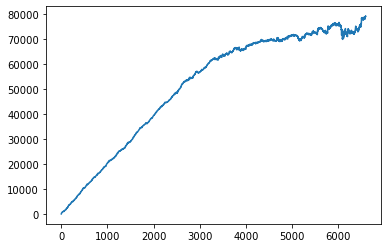

In [23]:
tradeloglong['pnl'].cumsum().plot()

In [24]:
total=tradeloglong['pnl'].sum()

In [25]:
total

79294.49999999965

In [26]:
tradelogshort = pd.DataFrame(columns='trade_type,entry_time,entry_price,exit_time,exit_price'.split(','))

In [38]:
short_trade_triggered = 0
for index, row in data[1:].iterrows():
    previous_row = data.iloc[index-1]
    if (previous_row['close'] > previous_row['strend10_2']) & (row['close'] < row['strend10_2']) & (short_trade_triggered == 0):
        short_trade_triggered = 1
        tradelogshort = tradelogshort.append({'trade_type':'SELL',
                                      'entry_time':row['datetime'],
                                      'entry_price':row['close']},ignore_index=True)
        
    elif (short_trade_triggered == 1) & (previous_row['close'] < previous_row['strend10_2']) & (row['close'] > row['strend10_2'])  :
        short_trade_triggered = 0
        tradelogshort = tradelogshort.append({'exit_time':row['datetime'],
                                      'exit_price':row['close']},ignore_index=True)

In [39]:
tradelogshort

,trade_type,entry_time,entry_price,exit_time,exit_price,pnl
0,SELL,2016-01-01 11:36:00,16888.2,2016-01-01 12:06:00,16915.0,-26.8
1,SELL,2016-01-01 12:39:00,16894.4,2016-01-01 13:30:00,16895.0,-0.6
2,SELL,2016-01-04 09:18:00,16928.0,2016-01-04 14:18:00,16663.9,264.1
3,SELL,2016-01-04 14:36:00,16614.8,2016-01-05 09:18:00,16655.7,-40.9
4,SELL,2016-01-05 09:24:00,16615.9,2016-01-05 10:12:00,16644.3,-28.4
...,...,...,...,...,...,...
9893,SELL,2020-12-30 15:18:00,31291.8,NaT,NaN,NaN
9894,NaN,NaN,NaN,2020-12-31 09:21:00,31248.7,NaN
9895,SELL,2020-12-31 10:54:00,31285.0,NaT,NaN,NaN
9896,NaN,NaN,NaN,2020-12-31 12:30:00,31254.5,NaN


In [40]:
tradelogshort['exit_time'] = tradelogshort['exit_time'].shift(-1)
tradelogshort['exit_price'] = tradelogshort['exit_price'].shift(-1)
tradelogshort

,trade_type,entry_time,entry_price,exit_time,exit_price,pnl
0,SELL,2016-01-01 11:36:00,16888.2,2016-01-01 13:30:00,16895.0,-26.8
1,SELL,2016-01-01 12:39:00,16894.4,2016-01-04 14:18:00,16663.9,-0.6
2,SELL,2016-01-04 09:18:00,16928.0,2016-01-05 09:18:00,16655.7,264.1
3,SELL,2016-01-04 14:36:00,16614.8,2016-01-05 10:12:00,16644.3,-40.9
4,SELL,2016-01-05 09:24:00,16615.9,2016-01-05 12:00:00,16580.1,-28.4
...,...,...,...,...,...,...
9893,SELL,2020-12-30 15:18:00,31291.8,2020-12-31 09:21:00,31248.7,NaN
9894,NaN,NaN,NaN,NaT,NaN,NaN
9895,SELL,2020-12-31 10:54:00,31285.0,2020-12-31 12:30:00,31254.5,NaN
9896,NaN,NaN,NaN,NaT,NaN,NaN


In [41]:
tradelogshort.dropna(inplace=True)
tradelogshort.reset_index(drop=True,inplace=True)
tradelogshort

,trade_type,entry_time,entry_price,exit_time,exit_price,pnl
0,SELL,2016-01-01 11:36:00,16888.2,2016-01-01 13:30:00,16895.0,-26.8
1,SELL,2016-01-01 12:39:00,16894.4,2016-01-04 14:18:00,16663.9,-0.6
2,SELL,2016-01-04 09:18:00,16928.0,2016-01-05 09:18:00,16655.7,264.1
3,SELL,2016-01-04 14:36:00,16614.8,2016-01-05 10:12:00,16644.3,-40.9
4,SELL,2016-01-05 09:24:00,16615.9,2016-01-05 12:00:00,16580.1,-28.4
...,...,...,...,...,...,...
3293,SELL,2020-12-29 10:45:00,31149.7,2020-12-30 09:42:00,31304.0,-55.3
3294,SELL,2020-12-30 09:18:00,31311.6,2020-12-30 10:57:00,31286.9,7.6
3295,SELL,2020-12-30 10:27:00,31166.1,2020-12-30 13:00:00,31160.8,-120.8
3296,SELL,2020-12-30 11:36:00,31186.2,2020-12-31 09:21:00,31248.7,25.4


In [42]:
tradelogshort['pnl'] = tradelogshort['entry_price'] - tradelogshort['exit_price']

In [43]:
tradelogshort

,trade_type,entry_time,entry_price,exit_time,exit_price,pnl
0,SELL,2016-01-01 11:36:00,16888.2,2016-01-01 13:30:00,16895.0,-6.8
1,SELL,2016-01-01 12:39:00,16894.4,2016-01-04 14:18:00,16663.9,230.5
2,SELL,2016-01-04 09:18:00,16928.0,2016-01-05 09:18:00,16655.7,272.3
3,SELL,2016-01-04 14:36:00,16614.8,2016-01-05 10:12:00,16644.3,-29.5
4,SELL,2016-01-05 09:24:00,16615.9,2016-01-05 12:00:00,16580.1,35.8
...,...,...,...,...,...,...
3293,SELL,2020-12-29 10:45:00,31149.7,2020-12-30 09:42:00,31304.0,-154.3
3294,SELL,2020-12-30 09:18:00,31311.6,2020-12-30 10:57:00,31286.9,24.7
3295,SELL,2020-12-30 10:27:00,31166.1,2020-12-30 13:00:00,31160.8,5.3
3296,SELL,2020-12-30 11:36:00,31186.2,2020-12-31 09:21:00,31248.7,-62.5


In [44]:
selltotal=tradelogshort['pnl'].sum()

<AxesSubplot:>

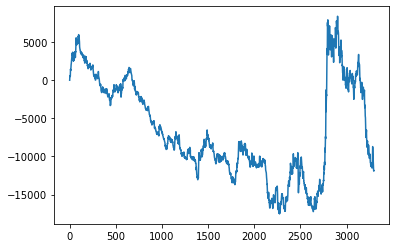

In [45]:
tradelogshort['pnl'].cumsum().plot()

In [46]:
selltotal

-11857.300000000176

In [47]:
totalpnl=total+selltotal

In [48]:
totalpnl

67437.19999999947

In [49]:
dataframe = pd.concat([tradeloglong,tradelogshort],axis=0)

In [50]:
dataframe

,trade_type,entry_time,entry_price,exit_time,exit_price,pnl
0,BUY,2016-01-01 12:06:00,16915.0,2016-01-01 12:39:00,16894.4,-20.6
1,BUY,2016-01-01 13:30:00,16895.0,2016-01-01 14:06:00,17135.9,240.9
2,BUY,2016-01-04 14:18:00,16663.9,2016-01-04 14:24:00,16659.0,-4.9
3,BUY,2016-01-05 09:18:00,16655.7,2016-01-05 09:21:00,16658.6,2.9
4,BUY,2016-01-05 10:12:00,16644.3,2016-01-05 10:24:00,16660.1,15.8
...,...,...,...,...,...,...
3293,SELL,2020-12-29 10:45:00,31149.7,2020-12-30 09:42:00,31304.0,-154.3
3294,SELL,2020-12-30 09:18:00,31311.6,2020-12-30 10:57:00,31286.9,24.7
3295,SELL,2020-12-30 10:27:00,31166.1,2020-12-30 13:00:00,31160.8,5.3
3296,SELL,2020-12-30 11:36:00,31186.2,2020-12-31 09:21:00,31248.7,-62.5


In [51]:
dataframe.sort_values(by='entry_time',ascending=True)

,trade_type,entry_time,entry_price,exit_time,exit_price,pnl
0,SELL,2016-01-01 11:36:00,16888.2,2016-01-01 13:30:00,16895.0,-6.8
0,BUY,2016-01-01 12:06:00,16915.0,2016-01-01 12:39:00,16894.4,-20.6
3299,BUY,2016-01-01 12:06:00,16915.0,2016-01-01 12:39:00,16894.4,-20.6
1,SELL,2016-01-01 12:39:00,16894.4,2016-01-04 14:18:00,16663.9,230.5
1,BUY,2016-01-01 13:30:00,16895.0,2016-01-01 14:06:00,17135.9,240.9
...,...,...,...,...,...,...
3297,SELL,2020-12-30 15:18:00,31291.8,2020-12-31 12:30:00,31254.5,37.3
6596,BUY,2020-12-31 09:21:00,31248.7,2020-12-31 10:54:00,31285.0,36.3
3297,BUY,2020-12-31 09:21:00,31248.7,2020-12-31 09:27:00,31353.5,104.8
6597,BUY,2020-12-31 12:30:00,31254.5,2020-12-31 14:15:00,31322.5,68.0


In [52]:
dataframe.reset_index(drop=True)

,trade_type,entry_time,entry_price,exit_time,exit_price,pnl
0,BUY,2016-01-01 12:06:00,16915.0,2016-01-01 12:39:00,16894.4,-20.6
1,BUY,2016-01-01 13:30:00,16895.0,2016-01-01 14:06:00,17135.9,240.9
2,BUY,2016-01-04 14:18:00,16663.9,2016-01-04 14:24:00,16659.0,-4.9
3,BUY,2016-01-05 09:18:00,16655.7,2016-01-05 09:21:00,16658.6,2.9
4,BUY,2016-01-05 10:12:00,16644.3,2016-01-05 10:24:00,16660.1,15.8
...,...,...,...,...,...,...
9891,SELL,2020-12-29 10:45:00,31149.7,2020-12-30 09:42:00,31304.0,-154.3
9892,SELL,2020-12-30 09:18:00,31311.6,2020-12-30 10:57:00,31286.9,24.7
9893,SELL,2020-12-30 10:27:00,31166.1,2020-12-30 13:00:00,31160.8,5.3
9894,SELL,2020-12-30 11:36:00,31186.2,2020-12-31 09:21:00,31248.7,-62.5


In [ ]:
dataframe.tail(50)

In [ ]:
dataframe['pnl'].plot()

In [ ]:
dataframe.sort_values(by='entry_time',ascending=True)

In [ ]:

plt.bar(range(len(dataframe)), dataframe['pnl'], color='red')
plt.show()

In [ ]:
dataframe['pnl'].cumsum().plot(figsize=(16,6))

In [ ]:
#dataframe.to_csv('3 min supertrend and rsi.csv')

In [ ]:
medianData = dataframe.median()
medianData